## Problem Statement

Indian Premier League (IPL) is a league for Twenty20 (T20) cricket championships started in India. The auction price of the player depends on his performance in test matches or one-day internationals. The primary skill of the player also contributes to the auction price. We use different regression techniques to predict the auction price of the player.

## About the dataset (IPL Auction data)

**PLAYER NAME**: Name of the player<br>
**AGE**: The age of the player is classified into three categories. Category 1 means the player is less than 25 years old. Category 2 means the player is between 25 and 35 years and Category 3 means the player has aged more than 35.<br>
**COUNTRY**: Country of the player<br>
**PLAYING ROLE**: Player's primary skill<br>
**T-RUNS**: Total runs scored in the test matches<br>
**T-WKTS**: Total wickets taken in the test matches<br>
**ODI-RUNS-S**: Runs scored in One Day Internationals<br>
**ODI-SR-B**: Batting strike rate in One Day Internationals<br>
**ODI-WKTS**: Wickets taken in One Day Internationals<br>
**ODI-SR-BL**: Bowling strike rate in One Day Internationals<br>
**CAPTAINCY EXP**: Captained a team or not<br>
**RUNS-S**: Number of runs scored by a player<br>
**HS**: Highest score by a batsman in IPL<br>
**AVE**: Average runs scored by a batsman in IPL<br>
**SR-B**: Batting strike rate (ratio of the number of runs scored to the number of basses faced) in IPL.<br>
**SIXERS**: Number of six runs scored by a player in IPL.<br>
**RUNS-C**: Number of runs conceded by a player<br>
**WKTS**: Number of wickets were taken by a player in IPL.<br>
**AVE-BL**: Bowling average (number of runs conceded / number of wickets taken) in IPL.<br>
**ECON**: Economy rate of a bowler in IPL (number of runs conceded by the bowler per over).<br>
**SR-BL**: Bowling strike rate (ratio of the number of balls bowled to the number of wickets taken) in IPL.<br>
**SOLD PRICE**: Auction price of the player (Target Variable)<br>

## Table of Content

1. **[Import Libraries](#lib)**
2. **[Data Preparation](#prep)**
    - 2.1 - **[Read the Data](#read)**
    - 2.2 - **[Check the Data Type](#dtype)**
    - 2.3 - **[Remove Insignificant Variables](#drop)**
    - 2.4 - **[Missing Value Treatment](#null)**
    - 2.5 - **[Dummy Encode the Categorical Variables](#dummy)**
    - 2.6 - **[Scale the Data](#scale)**
    - 2.7 - **[Train-Test Split](#split)**
3. **[Multiple Linear Regression (OLS)](#linreg)**
4. **[Gradient Descent](#GD)**
    - 4.1 - **[Stochastic Gradient Descent (SGD)](#SGD)**
5. **[Regularization](#regu)**
    - 5.1 - **[Ridge Regression](#ridge)**
    - 5.2 - **[Lasso Regression](#lasso)**
    - 5.3 - **[Elastic Net Regression](#elastic)**
6. **[GridSearchCV](#GScv)**

<a id="lib"></a>
# 1. Import Libraries

**Let us import the required libraries.**

In [22]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

In [23]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

In [16]:
b=np.array([-0.35,-0.15,0.24,0.056])
np.sum(b**2)
np.sum(np.abs(b))

0.796

In [17]:
0.796/2

0.398

In [ ]:
#if alpha=0.5

In [15]:
r=np.array([0.278,-0.009,0.16,0.002])
np.sum(r**2)

0.10296900000000002

In [21]:
L=np.array([0.25,0,0.14,0])
np.sum(np.abs(L))

0.39

<a id="prep"></a>
# 2. Data Preparation

<a id="read"></a>
## 2.1 Read the Data

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wFKtXQ-D3xbHfb-96VsXEPmcOoQbfeEoMcHUmDdhATz91ZTie6PmhA
Mounted at /content/drive


#### Read the dataset and print the first five observations.

In [25]:
# load the csv file
# store the data in 'df_ipl'
df_ipl = pd.read_csv('/content/drive/My Drive/SLR/IPL_IMB_data.csv')

# display first five observations using head()
df_ipl.head()

,PLAYER NAME,AGE,COUNTRY,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,CAPTAINCY EXP,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,SOLD PRICE
0,"Abdulla, YA",2,SA,Allrounder,0,0,0,0.000000,0,0.000000,0,0,0,0.000000,0.000000,0,307,15,20.470000,8.900000,13.930000,50000
1,Abdur Razzak,2,BAN,Bowler,214,18,657,71.410000,185,37.600000,0,0,0,0.000000,0.000000,0,29,0,0.000000,14.500000,0.000000,50000
2,"Agarkar, AB",2,IND,Bowler,571,58,1269,80.620000,288,32.900000,0,167,39,18.560000,121.010000,5,1059,29,36.520000,8.810000,24.900000,350000
3,"Ashwin, R",1,IND,Bowler,284,31,241,84.560000,51,36.800000,0,58,11,5.800000,76.320000,0,1125,49,22.960000,6.230000,22.140000,850000
4,"Badrinath, S",2,IND,Batsman,63,0,79,45.930000,0,0.000000,0,1317,71,32.930000,120.710000,28,0,0,0.000000,0.000000,0.000000,800000


**Let us now see the number of variables and observations in the data.**

In [26]:
# use 'shape' to check the dimension of data
df_ipl.shape

(130, 22)

**Interpretation:** The data has 130 observations and 22 variables.

<a id="dtype"></a>
## 2.2 Check the Data Type

**Check the data type of each variable. If the data type is not as per the data definition, change the data type.**

In [27]:
# use 'dtypes' to check the data type of a variable
df_ipl.dtypes

PLAYER NAME       object
AGE                int64
COUNTRY           object
PLAYING ROLE      object
T-RUNS             int64
T-WKTS             int64
ODI-RUNS-S         int64
ODI-SR-B         float64
ODI-WKTS           int64
ODI-SR-BL        float64
CAPTAINCY EXP      int64
RUNS-S             int64
HS                 int64
AVE              float64
SR-B             float64
SIXERS             int64
RUNS-C             int64
WKTS               int64
AVE-BL           float64
ECON             float64
SR-BL            float64
SOLD PRICE         int64
dtype: object

**Interpretation:** The variables `PLAYER NAME`, `COUNTRY` and `PLAYING ROLE` are categorical. All the remaining variables are numerical. 

From the above output, we see that the data type of `AGE` and `CAPTAINCY EXP` is 'int64'.

But according to the data definition, `AGE` and `CAPTAINCY EXP` are categorical variables, which are wrongly interpreted as 'int64', so we will convert these variables data type to 'object'.

#### Change the data type as per the data definition.

In [28]:
# convert numerical variables to categorical (object) 
# use astype() to change the data type

# change the data type of 'AGE' 
df_ipl['AGE'] = df_ipl['AGE'].astype('object')

# change the data type of 'CAPTAINCY EXP'
df_ipl['CAPTAINCY EXP'] = df_ipl['CAPTAINCY EXP'].astype('object')

#### Recheck the data type after the conversion. 

In [29]:
# recheck the data types using 'dtypes'
df_ipl.dtypes

PLAYER NAME       object
AGE               object
COUNTRY           object
PLAYING ROLE      object
T-RUNS             int64
T-WKTS             int64
ODI-RUNS-S         int64
ODI-SR-B         float64
ODI-WKTS           int64
ODI-SR-BL        float64
CAPTAINCY EXP     object
RUNS-S             int64
HS                 int64
AVE              float64
SR-B             float64
SIXERS             int64
RUNS-C             int64
WKTS               int64
AVE-BL           float64
ECON             float64
SR-BL            float64
SOLD PRICE         int64
dtype: object

**Interpretation:** Now, all the variables have the correct data type.

<a id="drop"></a>
## 2.3 Remove Insignificant Variables

The column `PLAYER NAME` contains the name of the player, which is redundant for further analysis. Thus, we drop the column.

In [30]:
# drop the column 'PLAYER NAME' using drop()
# 'axis = 1' drops the specified column
df_ipl = df_ipl.drop('PLAYER NAME', axis = 1)

<a id="null"></a>
## 2.4 Missing Value Treatment

First run a check for the presence of missing values and their percentage for each column. Then choose the right approach to treat them.

In [31]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df_ipl.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df_ipl.isnull().sum()*100/df_ipl.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
SOLD PRICE,0,0.000000
CAPTAINCY EXP,0,0.000000
COUNTRY,0,0.000000
PLAYING ROLE,0,0.000000
T-RUNS,0,0.000000
T-WKTS,0,0.000000
ODI-RUNS-S,0,0.000000
ODI-SR-B,0,0.000000
ODI-WKTS,0,0.000000
ODI-SR-BL,0,0.000000


**Interpretation:** The above output shows that there are no missing values in the data.

<a id="dummy"></a>
## 2.5 Dummy Encode the Categorical Variables

#### Split the dependent and independent variables.

In [32]:
# store the target variable 'SOLD PRICE' in a dataframe 'df_target'
df_target = df_ipl['SOLD PRICE']

# store all the independent variables in a dataframe 'df_feature' 
# drop the column 'SOLD PRICE' using drop()
# 'axis = 1' drops the specified column
df_feature = df_ipl.drop('SOLD PRICE', axis = 1)

#### Filter numerical and categorical variables.

In [33]:
# filter the numerical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.number]' will include all the numerical variables
df_num = df_feature.select_dtypes(include = [np.number])

# display numerical features
df_num.columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL'],
      dtype='object')

In [34]:
# filter the categorical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.object]' will include all the categorical variables
df_cat = df_feature.select_dtypes(include = [np.object])

# display categorical features
df_cat.columns

Index(['AGE', 'COUNTRY', 'PLAYING ROLE', 'CAPTAINCY EXP'], dtype='object')

The regression method fails in presence of categorical variables. To overcome this we use (n-1) dummy encoding. 

**Encode the each categorical variable and create (n-1) dummy variables for n categories of the variable.**

In [35]:
# use 'get_dummies' from pandas to create dummy variables
# use 'drop_first' to create (n-1) dummy variables
dummy_var = pd.get_dummies(data = df_cat, drop_first = True)

<a id="scale"></a>
## 2.6 Scale the Data 

We scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.

In [36]:
# initialize the standard scalar
X_scaler = StandardScaler()

# scale all the numeric variables
# standardize all the columns of the dataframe 'df_num'
num_scaled = X_scaler.fit_transform(df_num)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
df_num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)

# standardize the target variable explicitly and store it in a new variable 'y'
y = (df_target - df_target.mean()) / df_target.std()

#### Concatenate scaled numerical and dummy encoded categorical variables.

In [37]:
# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
X = pd.concat([df_num_scaled, dummy_var], axis = 1)

# display first five observations
X.head()

,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AGE_2,AGE_3,COUNTRY_BAN,COUNTRY_ENG,COUNTRY_IND,COUNTRY_NZ,COUNTRY_PAK,COUNTRY_SA,COUNTRY_SL,COUNTRY_WI,COUNTRY_ZIM,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper,CAPTAINCY EXP_1
0,-0.657994,-0.468108,-0.703043,-2.758455,-0.686760,-1.277132,-0.839099,-1.307954,-1.693829,-3.102880,-0.745369,-0.303010,-0.099814,-0.127413,0.547597,-0.226928,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,-0.593006,-0.341460,-0.518927,0.009520,0.983269,0.133821,-0.839099,-1.307954,-1.693829,-3.102880,-0.745369,-0.802864,-0.790019,-1.115257,1.685233,-1.142498,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,-0.484592,-0.060022,-0.347421,0.366516,1.913068,-0.042548,-0.566604,-0.232487,-0.014415,0.278190,-0.534721,1.049112,0.544377,0.647130,0.529313,0.494091,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,-0.571749,-0.249993,-0.635505,0.519237,-0.226374,0.103801,-0.744460,-1.004617,-1.169012,-0.970467,-0.745369,1.167783,1.464649,-0.007250,0.005188,0.312686,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,-0.638862,-0.468108,-0.680904,-0.978129,-0.686760,-1.277132,1.309858,0.649946,1.285864,0.269808,0.434258,-0.855007,-0.790019,-1.115257,-1.260432,-1.142498,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0


**Interpretation:** We can see that the dummy variables are added to the data. '1' in the column 'AGE_2' represents that the age of the corresponding player is between 25 to 35 years. Also, the '0' in both the columns 'AGE_2' and 'AGE_3' indicates that the age of the corresponding player is less than 25.

<a id="split"></a>
## 2.7 Train-Test Split

Before applying variour regression techniques to predict the auction price of the player, let us split the dataset in train and test set.

In [38]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (104, 31)
y_train (104,)
X_test (26, 31)
y_test (26,)


## Create generalized functions to calculate various metrics for models

#### Create a generalized function to calculate the RMSE for train and test set.

In [39]:
# create a generalized function to calculate the RMSE values for train set
def get_train_rmse(model):
    
    # For training set:
    # train_pred: prediction made by the model on the training dataset 'X_train'
    # y_train: actual values ofthe target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(X_train)

    # calculate the MSE using the "mean_squared_error" function

    # MSE for the train data
    mse_train = mean_squared_error(y_train, train_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_train = round(np.sqrt(mse_train), 4)
    
    # return the training RMSE
    return(rmse_train)

In [40]:
# create a generalized function to calculate the RMSE values test set
def get_test_rmse(model):
    
    # For testing set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data
    test_pred = model.predict(X_test)

    # MSE for the test data
    mse_test = mean_squared_error(y_test, test_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_test = round(np.sqrt(mse_test), 4)

    # return the test RMSE
    return(rmse_test)

#### Create a generalized function to calculate the MAPE for test set.

In [41]:
# define a function to calculate MAPE
# pass the actual and predicted values as input to the function
# return the calculated MAPE 
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

def get_test_mape(model):
    
    # For testing set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data
    test_pred = model.predict(X_test)
    
    # calculate the mape using the "mape()" function created above
    # calculate the MAPE for the test data
    mape_test = mape(y_test, test_pred)

    # return the MAPE for the test set
    return(mape_test)

#### Create a generalized function to calculate the R-Squared and Adjusted R- Squared

In [42]:
# define a function to get R-squared and adjusted R-squared value
def get_score(model):
    
    # score() returns the R-squared value
    r_sq = model.score(X_train, y_train)
    
    # calculate adjusted R-squared value
    # 'n' denotes number of observations in train set
    # 'shape[0]' returns number of rows 
    n = X_train.shape[0]
    
    # 'k' denotes number of variables in train set
    # 'shape[1]' returns number of columns
    k = X_train.shape[1]
    
    # calculate adjusted R-squared using the formula
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    
    # return the R-squared and adjusted R-squared value 
    return ([r_sq, r_sq_adj])

#### Create a generalized function to create a dataframe containing the scores from all the models

In [43]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Model_Name', 'Alpha (Wherever Required)', 'l1-ratio', 'R-Squared',
                                       'Adj. R-Squared', 'Test_RMSE', 'Test_MAPE'])

# create a function to update the score card for comparision of the scores from different algorithms
# pass the model name, model build, alpha and l1_ration as input parameters
# if 'alpha' and/or 'l1_ratio' is not specified, the function assigns '-'
def update_score_card(algorithm_name, model, alpha = '-', l1_ratio = '-'):
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model_Name': algorithm_name,
                       'Alpha (Wherever Required)': alpha, 
                       'l1-ratio': l1_ratio, 
                       'Test_MAPE': get_test_mape(model), 
                       'Test_RMSE': get_test_rmse(model), 
                       'R-Squared': get_score(model)[0], 
                       'Adj. R-Squared': get_score(model)[1]}, ignore_index = True)

#### Create a generalized function to plot a barchart for the coefficients

In [44]:
# define a function to plot a barplot
# pass the model 
def plot_coefficients(model, algorithm_name):
    # create a dataframe of variable names and their corresponding value of coefficients obtained from model
    # 'columns' returns the column names of the dataframe 'X'
    # 'coef_' returns the coefficient of each variable
    df_coeff = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})

    # sort the dataframe in descending order
    # 'sort_values' sorts the column based on the values
    # 'ascending = False' sorts the values in the descending order
    sorted_coeff = df_coeff.sort_values('Coefficient', ascending = False)

    # plot a bar plot with Coefficient on the x-axis and Variable names on y-axis
    # pass the data to the parameter, 'sorted_coeff' to plot the barplot
    sns.barplot(x = "Coefficient", y = "Variable", data = sorted_coeff)
    
    # add x-axis label
    # set the size of the text using 'fontsize'
    plt.xlabel("Coefficients from {}".format(algorithm_name), fontsize = 15)

    # add y-axis label
    # set the size of the text using 'fontsize'
    plt.ylabel('Features', fontsize = 15)

<a id="linreg"></a>
# 3. Multiple Linear Regression (OLS)

#### Build a MLR model on a training dataset.

In [45]:
# initiate linear regression model
linreg = LinearRegression()

# build the model using X_train and y_train
# use fit() to fit the regression model
MLR_model = linreg.fit(X_train, y_train)

# print the R-squared value for the model
# score() returns the R-squared value
MLR_model.score(X_train, y_train)

0.5861565829183139

In [46]:
# print training RMSE
print('RMSE on train set: ', get_train_rmse(MLR_model))

# print training RMSE
print('RMSE on test set: ', get_test_rmse(MLR_model))

# calculate the difference between train and test set RMSE
difference = abs(get_test_rmse(MLR_model) - get_train_rmse(MLR_model))

# print the difference between train and test set RMSE
print('Difference between RMSE on train and test set: ', difference)

RMSE on train set:  0.6591
RMSE on test set:  0.8634
Difference between RMSE on train and test set:  0.20429999999999993


**Interpretation:** RMSE on the training set is 0.6591, while on the test set it is 0.8634. We can see that there is a large difference in the RMSE of the train and the test set. This implies that our model has overfitted on the train set. 

To deal with the problem of overfitting, we study the approach of `Regularization` in the later section. 

In [47]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Linear Regression', model = MLR_model)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.586157,0.407974,0.863400,252.515937


<a id="GD"></a>
# 4. Gradient Descent

<a id="SGD"></a>
## 4.1 Stochastic Gradient Descent

The gradient descent method considers all the data points to calculate the values of the parameters at each step. For a very large dataset, this method becomes computationally expensive. To avoid this problem, we use Stochastic Gradient Descent (SGD) which considers a single data point (sample) to perform each iteration. Each sample is randomly selected for performing the iteration.

####  Build MLR model using SGD method.

In [ ]:
# instantiate the SGDRegressor
# set 'random_state' to generate the same dataset each time you run the code 
sgd = SGDRegressor(random_state = 10)

# build the model on train data 
# use fit() to fit the model
linreg_with_SGD = sgd.fit(X_train, y_train)

# print RMSE for train set
# call the function 'get_train_rmse'
print('RMSE on train set:', get_train_rmse(linreg_with_SGD))

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(linreg_with_SGD))

RMSE on train set: 0.7174
RMSE on test set: 0.8136


#### Visualize the change in values of coefficients obtained from `MLR_model (using OLS)` and `linreg_with_SGD`

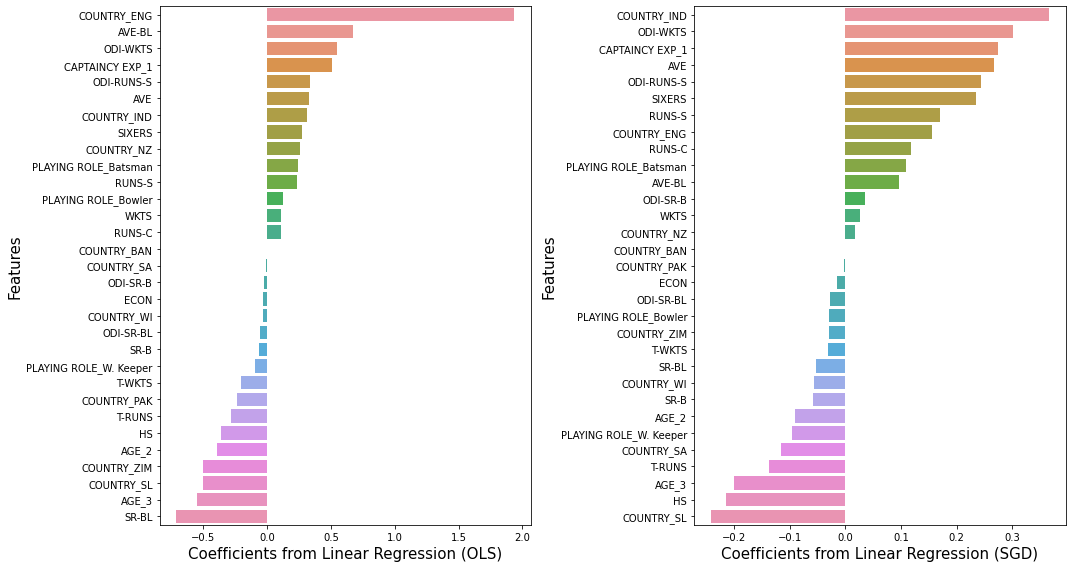

In [ ]:
# subplot() is used to plot the multiple plots as a subplot
# (1,2) plots a subplot of one row and two columns
# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,1)
plot_coefficients(MLR_model, 'Linear Regression (OLS)')

# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,2)
plot_coefficients(linreg_with_SGD, 'Linear Regression (SGD)')

# to adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

**Interpretation:** The coefficients obtained from SGD have smaller values as compared to the coefficients obtained from linear regression using OLS.

In [ ]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Linear Regression (using SGD)', model = linreg_with_SGD)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.586157,0.407974,0.863400,252.515937
1,Linear Regression (using SGD),-,-,0.509755,0.298677,0.813600,174.716611


<a id="regu"></a>
# 5. Regularization

One way to deal with the overfitting problem is by adding the `Regularization` to the model. It is observed that inflation of the coefficients cause overfitting. To prevent overfitting, it is important to regulate the coefficients by penalizing possible coefficient inflations. Regularization imposes penalties on parameters if they inflate to large values to prevent them from being weighted too heavily. In this section, we will learn about the three regularization techniques:

1. Ridge Regression
2. Lasso Regression
3. Elastic Net Regression

<a id="ridge"></a>
## 5.1 Ridge Regression

Most of the times our data can show multicollinearity in the variables. To analyze such data we can use `Ridge Regression`. It uses the L2 norm for regularization. 

#### Build regression model using Ridge Regression for alpha = 1.

In [ ]:
# use Ridge() to perform ridge regression
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run 
ridge = Ridge(alpha = 1, max_iter = 500)

# fit the model on train set
ridge.fit(X_train, y_train)

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 0.838


**Interpretation:** After applying the ridge regression with alpha equal to one, we get 0.838 as the RMSE value.

In [ ]:
# update the dataframe 'score_card'
update_score_card(algorithm_name='Ridge Regression (with alpha = 1)', model = ridge, alpha = 1)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.586157,0.407974,0.863400,252.515937
1,Ridge Regression (with alpha = 1),1,-,0.573461,0.389812,0.838000,255.654207


#### Build regression model using Ridge Regression for alpha = 2.

In [ ]:
# use Ridge() to perform ridge regression
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
ridge = Ridge(alpha = 2, max_iter = 500)

# fit the model on train set
ridge.fit(X_train, y_train)


# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 0.8317


**Interpretation:** After applying the ridge regression with alpha equal to two, the RMSE value decreased to 0.8317.

#### Visualize the change in values of coefficients obtained from `MLR_model (using OLS)` and `ridge_model`

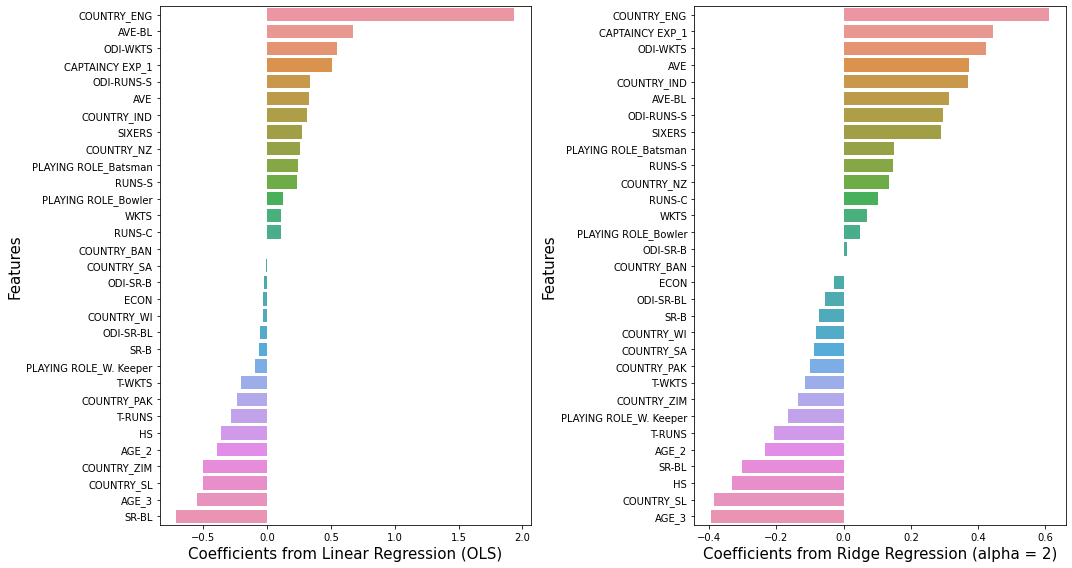

In [ ]:
# subplot() is used to plot the multiple plots as a subplot
# (1,2) plots a subplot of one row and two columns
# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,1)
plot_coefficients(MLR_model, 'Linear Regression (OLS)')

# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,2)
plot_coefficients(ridge, 'Ridge Regression (alpha = 2)')

# to adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

**Interpretation:** The coefficients obtained from ridge regression have smaller values as compared to the coefficients obtained from linear regression using OLS.

In [ ]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Ridge Regression (with alpha = 2)', model = ridge, alpha = '2')

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.586157,0.407974,0.863400,252.515937
1,Ridge Regression (with alpha = 1),1,-,0.573461,0.389812,0.838000,255.654207
2,Ridge Regression (with alpha = 2),2,-,0.561194,0.372264,0.831700,239.940149


<a id="lasso"></a>
## 5.2 Lasso Regression

Lasso regression shrinks the less important variable's coefficient to zero which makes this technique more useful when we are dealing with large number of variables. It is a type of regularization technique that uses L1 norm for regularization. 

In [ ]:
# use Lasso() to perform lasso regression
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
lasso = Lasso(alpha = 0.01, max_iter = 500)

# fit the model on train set
lasso.fit(X_train, y_train)

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(lasso))

RMSE on test set: 0.8198


**Interpretation:** After applying the lasso regression with alpha equal to 0.01, the RMSE value is 0.8198.

#### Visualize the change in values of coefficients obtained from `MLR_model (using OLS)` and `lasso_model`

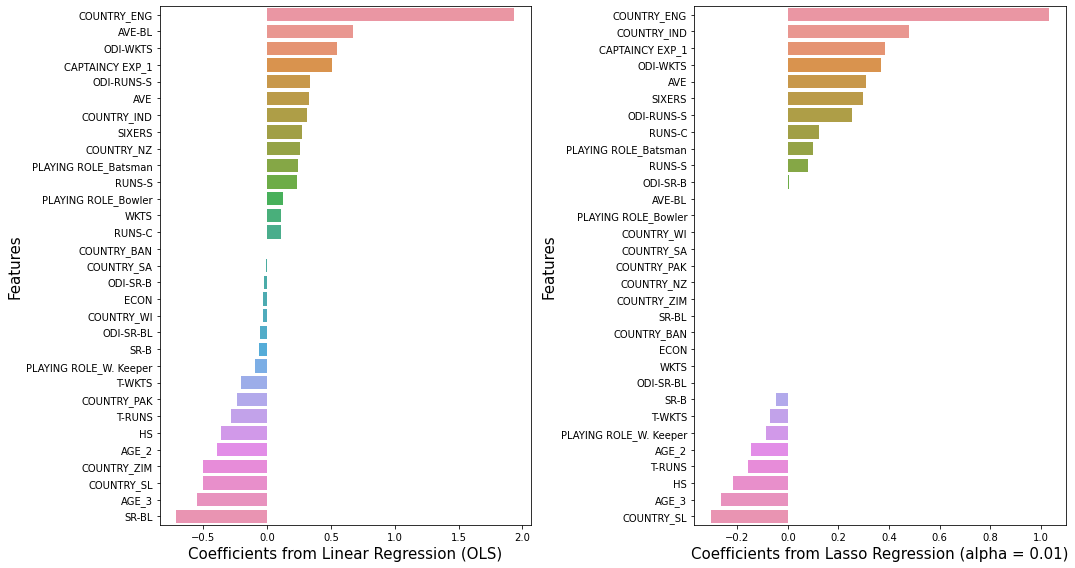

In [ ]:
# subplot() is used to plot the multiple plots as a subplot
# (1,2) plots a subplot of one row and two columns
# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,1)
plot_coefficients(MLR_model, 'Linear Regression (OLS)')

# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,2)
plot_coefficients(lasso, 'Lasso Regression (alpha = 0.01)')

# to adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

**Interpretation:** The second subplot (on the right) shows that the lasso regression have reduced the coefficients of some variables to zero.

Let us print the list of variables with zero coefficient.

In [ ]:
# create a dataframe to store the variable names and their corresponding coefficient values.
df_lasso_coeff = pd.DataFrame({'Variable': X.columns, 'Coefficient': lasso.coef_})

# print the variables having the coefficient value equal to zero
# 'to_list()' converts the output to the list type
print('Insignificant variables obtained from Lasso Regression when alpha is 0.01')
df_lasso_coeff.Variable[df_lasso_coeff.Coefficient == 0].to_list()

Insignificant variables obtained from Lasso Regression when alpha is 0.01


['ODI-SR-BL',
 'WKTS',
 'ECON',
 'SR-BL',
 'COUNTRY_BAN',
 'COUNTRY_NZ',
 'COUNTRY_PAK',
 'COUNTRY_SA',
 'COUNTRY_WI',
 'COUNTRY_ZIM',
 'PLAYING ROLE_Bowler']

In [ ]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Lasso Regression', model = lasso, alpha = '0.01')

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.586157,0.407974,0.863400,252.515937
1,Ridge Regression (with alpha = 1),1,-,0.573461,0.389812,0.838000,255.654207
2,Ridge Regression (with alpha = 2),2,-,0.561194,0.372264,0.831700,239.940149
3,Lasso Regression,0.01,-,0.543715,0.347259,0.819800,210.014068


<a id="elastic"></a>
## 5.3 Elastic Net Regression

This technique is a combination of Rigde and Lasso reression techniques. It considers the linear combination of penalties for L1 and L2 regularization.

In [ ]:
# use ElasticNet() to perform Elastic Net regression
# 'alpha' assigns the regularization strength to the model
# 'l1_ratio' is the ElasticNet mixing parameter
# 'l1_ratio = 0' performs Ridge regression
# 'l1_ratio = 1' performs Lasso regression
# pass number of iterations to 'max_iter'
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.01, max_iter = 500)

# fit the model on train data
enet.fit(X_train, y_train)


# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(enet))

RMSE on test set: 0.7984


**Interpretation:** With the elastic-net regression, we get 0.7984 as the RMSE value.

#### Visualize the change in values of coefficients obtained from `MLR_model (using OLS)` and `Elastic Net regression`

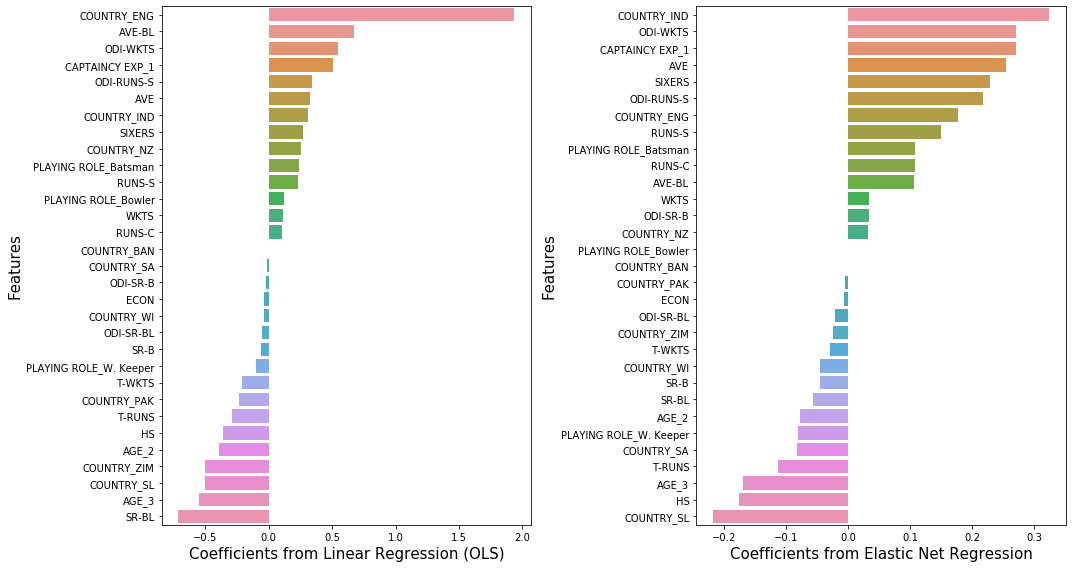

In [ ]:
# subplot() is used to plot the multiple plots as a subplot
# (1,2) plots a subplot of one row and two columns
# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,1)
plot_coefficients(MLR_model, 'Linear Regression (OLS)')

# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,2)
plot_coefficients(enet, 'Elastic Net Regression')

# to adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

In [ ]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Elastic Net Regression', model = enet, alpha = '0.1', l1_ratio = '0.01')

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.586157,0.407974,0.863400,252.515937
1,Linear Regression (using SGD),-,-,0.509755,0.298677,0.813600,174.716611
2,Ridge Regression (with alpha = 1),1,-,0.573461,0.389812,0.838000,255.654207
3,Ridge Regression (with alpha = 2),2,-,0.561194,0.372264,0.831700,239.940149
4,Lasso Regression,0.01,-,0.543715,0.347259,0.819800,210.014068
5,Elastic Net Regression,0.1,0.01,0.500086,0.284845,0.798400,169.139566


<a id="GScv"></a>
# 6. GridSearchCV

Hyperparameters are the parameters in the model that are preset by the user. GridSearch considers all the combinations of hyperparameters and returns the best hyperparameter values. Following are some of the parameters that GridSearchCV takes:

1. estimator: pass the machine learning algorithm model
2. param_grid: takes a dictionary having parameter names as keys and list of parameters as values
3. cv: number of folds for k-fold cross validation

### Find optimal value of alpha for `Ridge Regression`

In [ ]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]
 
# initiate the ridge regression model
ridge = Ridge()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the ridge regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
ridge_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Ridge Regression: ', ridge_grid.best_params_, '\n')

# print the RMSE for test set using the model having optimal value of alpha
print('RMSE on test set:', get_test_rmse(ridge_grid))

Best parameters for Ridge Regression:  {'alpha': 20} 

RMSE on test set: 0.7812


**Interpretation:** With the optimal value of alpha that we got from GridSearchCV, the RMSE of test set decreased to 0.7812.

In [ ]:
# update the dataframe 'score_card'
# 'best_params_' returns the dictionary containig best parameter values and parameter name  
# 'get()' returns the value of specified parameter
update_score_card(algorithm_name = 'Ridge Regression (using GridSearchCV)', 
                  model = ridge_grid, 
                  alpha = ridge_grid.best_params_.get('alpha'))

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.586157,0.407974,0.863400,252.515937
1,Linear Regression (using SGD),-,-,0.509755,0.298677,0.813600,174.716611
2,Ridge Regression (with alpha = 1),1,-,0.573461,0.389812,0.838000,255.654207
3,Ridge Regression (with alpha = 2),2,-,0.561194,0.372264,0.831700,239.940149
4,Lasso Regression,0.01,-,0.543715,0.347259,0.819800,210.014068
5,Elastic Net Regression,0.1,0.01,0.500086,0.284845,0.798400,169.139566
6,Ridge Regression (using GridSearchCV),20,-,0.464135,0.233416,0.781200,145.067851


### Find optimal value of alpha for `Lasso Regression`

In [ ]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20]}]
                     
# 'max_iter':100,500,1000,1500,2000
 
# initiate the lasso regression model 
lasso = Lasso()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the lasso regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
lasso_grid = GridSearchCV(estimator = lasso, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
lasso_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Lasso Regression: ', lasso_grid.best_params_, '\n')

# print the RMSE for the test set using the model having optimal value of alpha
print('RMSE on test set:', get_test_rmse(lasso_grid))

Best parameters for Lasso Regression:  {'alpha': 0.1} 

RMSE on test set: 0.7845


**Interpretation:** With the optimal value of alpha that we got from GridSearchCV, the RMSE of test set is 0.7845.

In [ ]:
# update the dataframe 'score_card'
# 'best_params_' returns the dictionary containig best parameter values and parameter name  
# 'get()' returns the value of specified parameter
update_score_card(algorithm_name = 'Lasso Regression (using GridSearchCV)', 
                  model = lasso_grid, 
                  alpha = lasso_grid.best_params_.get('alpha'))

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.586157,0.407974,0.863400,252.515937
1,Linear Regression (using SGD),-,-,0.509755,0.298677,0.813600,174.716611
2,Ridge Regression (with alpha = 1),1,-,0.573461,0.389812,0.838000,255.654207
3,Ridge Regression (with alpha = 2),2,-,0.561194,0.372264,0.831700,239.940149
4,Lasso Regression,0.01,-,0.543715,0.347259,0.819800,210.014068
5,Elastic Net Regression,0.1,0.01,0.500086,0.284845,0.798400,169.139566
6,Ridge Regression (using GridSearchCV),20,-,0.464135,0.233416,0.781200,145.067851
7,Lasso Regression (using GridSearchCV),0.100000,-,0.320183,0.027485,0.784500,172.591089


### Find optimal value of alpha for `Elastic Net Regression`

In [ ]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'l1_ratio' is the ElasticNet mixing parameter
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60],
                      'l1_ratio':[0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2]}]

# initiate the elastic net regression model  
enet = ElasticNet()

# use GridSearchCV() to find the optimal value of alpha and l1_ratio
# estimator: pass the elastic net regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)  #give scoring 'neg_mean_squared_error

# fit the model on X_train and y_train using fit()
enet_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_, '\n')

# print the RMSE for the test set using the model having optimal value of alpha and l1-ratio
print('RMSE on test set:', get_test_rmse(enet_grid))

Best parameters for Elastic Net Regression:  {'alpha': 0.1, 'l1_ratio': 0.0001} 

RMSE on test set: 0.7972


**Interpretation:** With the optimal value of alpha that we got from GridSearchCV, the RMSE of test set is 0.7972. 

In [ ]:
# update the dataframe 'score_card'
# 'best_params_' returns the dictionary containig best parameter values and parameter name  
# 'get()' returns the value of specified parameter
update_score_card(algorithm_name = 'Elastic Net Regression (using GridSearchCV)', 
                  model = enet_grid, 
                  alpha = enet_grid.best_params_.get('alpha'), 
                  l1_ratio = enet_grid.best_params_.get('l1_ratio'))

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.586157,0.407974,0.863400,252.515937
1,Linear Regression (using SGD),-,-,0.509755,0.298677,0.813600,174.716611
2,Ridge Regression (with alpha = 1),1,-,0.573461,0.389812,0.838000,255.654207
3,Ridge Regression (with alpha = 2),2,-,0.561194,0.372264,0.831700,239.940149
4,Lasso Regression,0.01,-,0.543715,0.347259,0.819800,210.014068
5,Elastic Net Regression,0.1,0.01,0.500086,0.284845,0.798400,169.139566
6,Ridge Regression (using GridSearchCV),20,-,0.464135,0.233416,0.781200,145.067851
7,Lasso Regression (using GridSearchCV),0.100000,-,0.320183,0.027485,0.784500,172.591089
8,Elastic Net Regression (using GridSearchCV),0.100000,0.000100,0.502697,0.288580,0.797200,169.794126


### Display the score card summary

We sort the dataframe `score_card` to get the model with least RMSE in the top.

In [ ]:
# sort the dataframe 'score_card' on 'Test_RMSE' in an ascending order using 'sort_values' 
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
score_card = score_card.sort_values('Test_RMSE').reset_index(drop = True)

# color the cell in the column 'Test_RMSE' having minimum RMSE value
# 'style.highlight_min' assigns color to the minimum value
# pass specified color to the parameter, 'color'
# pass the data to limit the color assignment to the parameter, 'subset' 
score_card.style.highlight_min(color = 'lightblue', subset = 'Test_RMSE')

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Ridge Regression (using GridSearchCV),20,-,0.464135,0.233416,0.7812,145.068
1,Lasso Regression (using GridSearchCV),0.1,-,0.320183,0.0274847,0.7845,172.591
2,Elastic Net Regression (using GridSearchCV),0.1,0.0001,0.502697,0.28858,0.7972,169.794
3,Elastic Net Regression,0.1,0.01,0.500086,0.284845,0.7984,169.14
4,Linear Regression (using SGD),-,-,0.509755,0.298677,0.8136,174.717
5,Lasso Regression,0.01,-,0.543715,0.347259,0.8198,210.014
6,Ridge Regression (with alpha = 2),2,-,0.561194,0.372264,0.8317,239.94
7,Ridge Regression (with alpha = 1),1,-,0.573461,0.389812,0.838,255.654
8,Linear Regression,-,-,0.586157,0.407974,0.8634,252.516


**Interpretation:** We can see that `Ridge Regression (using GridSearchCV)` has the lowest test RMSE. Here, ridge regression with `alpha = 20` seems to deal with the problem of overfitting efficiently.